# Image Augmentation

In diesem Notebook wird das letzt Notebook um eine sogenannte Image-Augmentation erweitert.

Diese wird angewandt um das Trainingsset künstlich zu erweitern in dem zufällige Transformationen auf die Bilder angewandt werden.

![](https://blog.keras.io/img/imgclf/cat_data_augmentation.png)

Welche Transformationen Sinn machen und ob diese Technik wirklich hilft ist extrem abhängig von der spezifischen Anwendungen. Da aber quasi alle praktischen Anwendungen chronisch zu wenig Daten haben, ist es eine sehr häufg verwendete Technik.

In [1]:
from keras import models
from keras import layers

from keras.preprocessing.image import ImageDataGenerator

from keras import optimizers

import pylab as pl


TRAINSET = 'Cat_Dog_data/train'
TESTSET = 'Cat_Dog_data/test'

TARGET_SIZE = (150,150)
BATCH_SIZE = 16

Using TensorFlow backend.


Als einziger Unterschied zum vorherigen Notebook werden im Generator für die Trainingsdaten einige Transfomrationen eingefügt, wie z.B. das zufällige horizontale Flippen der Bilder, oder einen zufälligen Zoom um +- 20%.

Eine Augmentation des Test-sets macht erstmal keinen Sinn.

In [2]:
# load data

image_datagen_train = ImageDataGenerator(rescale=1./255,
                                         shear_range=0.2,
                                         zoom_range=0.2,
                                         horizontal_flip=True,
                                         brightness_range=(0.8,1.2))

image_flow_from_directory_train = image_datagen_train.flow_from_directory(TRAINSET,
                                                             target_size=TARGET_SIZE,
                                                             color_mode='rgb',
                                                             batch_size=BATCH_SIZE,
                                                             class_mode='binary')

image_datagen_test = ImageDataGenerator(rescale=1./255)

image_flow_from_directory_test = image_datagen_test.flow_from_directory(TESTSET,
                                                             target_size=TARGET_SIZE,
                                                             color_mode='rgb',
                                                             batch_size=BATCH_SIZE,
                                                             class_mode='binary')

Found 22500 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [3]:
# define model

model = models.Sequential()

model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(TARGET_SIZE[0],TARGET_SIZE[1],3)))
model.add(layers.Conv2D(32,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64,(3,3)))
model.add(layers.Conv2D(64,(3,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3)))
model.add(layers.Conv2D(128,(3,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(256,(3,3)))
model.add(layers.Conv2D(256,(3,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 146, 146, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 69, 69, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 34, 34, 64)        0         
_________________________________________________________________
conv

In [0]:
# assemble model

model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

In [5]:
# train model

history = model.fit_generator(image_flow_from_directory_train,
                   steps_per_epoch=150,
                   epochs=10,
                   validation_data=image_flow_from_directory_test,
                   validation_steps=50,
                   verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
150/150 [==============================] - 30s 197ms/step - loss: 0.6924 - acc: 0.5396 - val_loss: 0.6727 - val_acc: 0.6125
Epoch 2/10
150/150 [==============================] - 25s 168ms/step - loss: 0.6587 - acc: 0.6112 - val_loss: 0.6595 - val_acc: 0.6112
Epoch 3/10
150/150 [==============================] - 25s 167ms/step - loss: 0.6513 - acc: 0.6179 - val_loss: 0.6265 - val_acc: 0.6488
Epoch 4/10
150/150 [==============================] - 25s 168ms/step - loss: 0.6169 - acc: 0.6721 - val_loss: 0.5719 - val_acc: 0.7030
Epoch 5/10
150/150 [==============================] - 25s 168ms/step - loss: 0.5860 - acc: 0.6963 - val_loss: 0.5845 - val_acc: 0.6825
Epoch 6/10
150/150 [==============================] - 25s 167ms/step - loss: 0.5779 - acc: 0.6979 - val_loss: 0.5525 - val_acc: 0.7000
Epoch 7/10
150/150 [==============================] - 25s 167ms/step - loss: 0.5522 - acc: 0.7250 - val_loss: 0.5934 - val_acc: 0.6789
Epoch 8

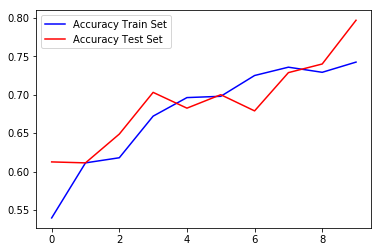

In [6]:
# plot history

pl.figure()
pl.plot(history.history['acc'],'b',label='Accuracy Train Set')
pl.plot(history.history['val_acc'],'r',label='Accuracy Test Set')

pl.legend()